#**GRIP @The Sparks Foundation**
##**Role : Data Science And Business Analytics Internship**
##**Author : Aditya Nair**
##**Task-3 : Prediction Using Decision Tree Algorithm**

###***Task-Strategy: In this particular task we have been given the iris dataset and we need to classify it using the descision tree classifier. A decision tree has a tree like structure. It learns the patterns by  partitioning the source set into subsets based on their attribute values.It gets carried on every subset recursively. The recursion is completed when the subset at a node all has the same value of the target variable, or when splitting no longer adds value to the predictions. Decision trees work great on high dimensional data and also has a good accuracy. Decision tree method takes the inductive approach for learning on classification problems.***

###***Technical-Stack Used -> Pandas , Numpy , Scikit , Matplotlib***

####**Step-1->Import the necessary Libraries Required**

---



In [158]:
#Import all the necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier , export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
from IPython.display import Image   

####**Step-2->Load the Iris dataset from sklearn and create the input feature and target label**
---

In [159]:
#Load the Iris dataset
loaded_iris_data = load_iris()
print(loaded_iris_data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [161]:
#Create the input feature and the target label
x = loaded_iris_data.data
y = loaded_iris_data.target
print(x)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

####**Step-3->Exploratory Data Anaysis**
---

In [146]:
#Create a pandas dataframe for the loaded dataset
decTreeData = pd.DataFrame(data = loaded_iris_data.data , columns = loaded_iris_data.feature_names)
decTreeData['Species'] = loaded_iris_data.target
decTreeData.Species = decTreeData.Species.apply(lambda usethisName : loaded_iris_data['target_names'][usethisName])#we will create the target values in the form of Species names
decTreeData.Species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [147]:
#Explore the first 20 columns
decTreeData.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [148]:
decTreeData.shape #We can see the shape of our dataframe and as we can see we have 150 rows and 5 columns including 4 input features and 1 target label column

(150, 5)

In [150]:
decTreeData.describe()#some important data regarding the dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [149]:
decTreeData.info()#datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [151]:
#Note-> It is always a good practice to check for any missing/null values at this point of time
decTreeData.isnull()#as we can see that there we have false returned which shows we have no null values 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [59]:
decTreeData.isnull().sum()#we have no null values as well thats great

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

####**Step-4->Visualiztion on our datasets features and labels**
---

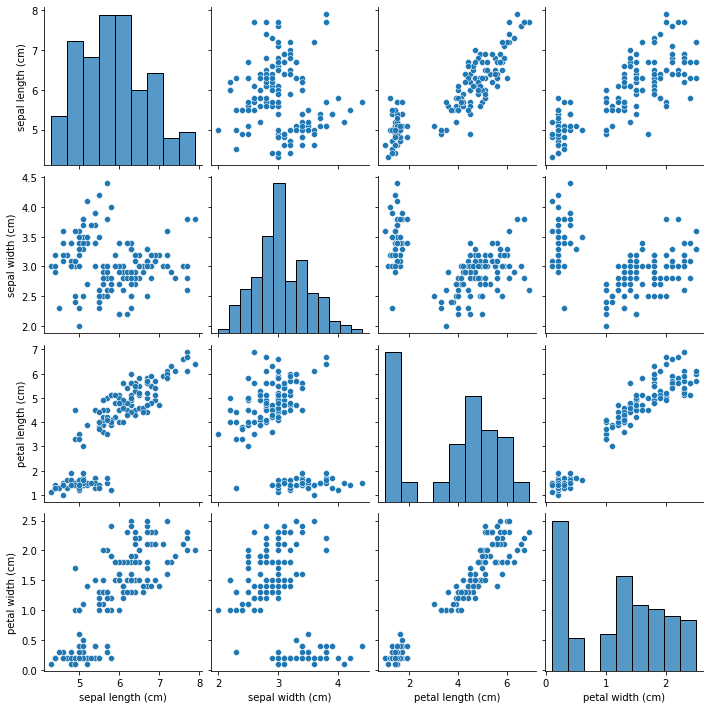

In [152]:
sns.pairplot(data = decTreeData)#Plot the dataframe

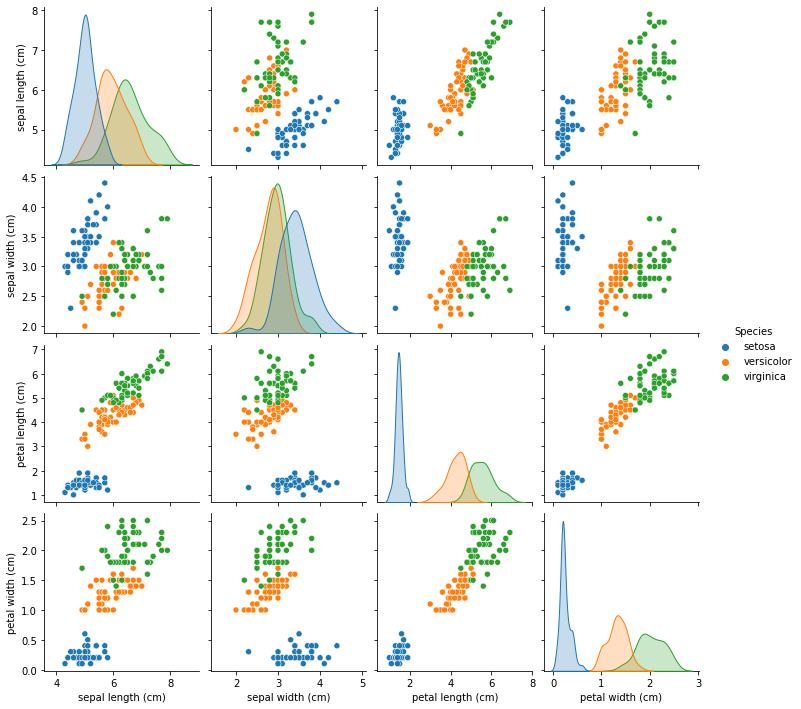

In [153]:
sns.pairplot(data = decTreeData , hue ="Species" )#Plot for the Species(Label)

####**Step-5->Time for Model Training**
---

In [121]:
Xfeature_train , Xfeature_test , Ylabel_train , Ylabel_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)#Split the data into train and test

decTreeModel = DecisionTreeClassifier()
decTreeModel.fit(Xfeature_train , Ylabel_train)#train the model
print("Model training is completed successfully")

Model training is completed successfully


####**Step-6->Time for Model Prediction**
---

In [122]:
Ylabel_Prediction = decTreeModel.predict(Xfeature_test)#prediction time
print("Model prediction is completed successfully")

Model prediction is completed successfully


####**Step-7->Compare the Actual Data VS the data predicted by our model**
---

In [123]:
comparison_data = pd.DataFrame({'Actual' : Ylabel_test , 'Predicted' : Ylabel_Prediction})#create the dataframe for comparing the actual vs predicted
comparison_data

,Actual,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1


####**Step-8->Visualize the Decision Tree Model**
---

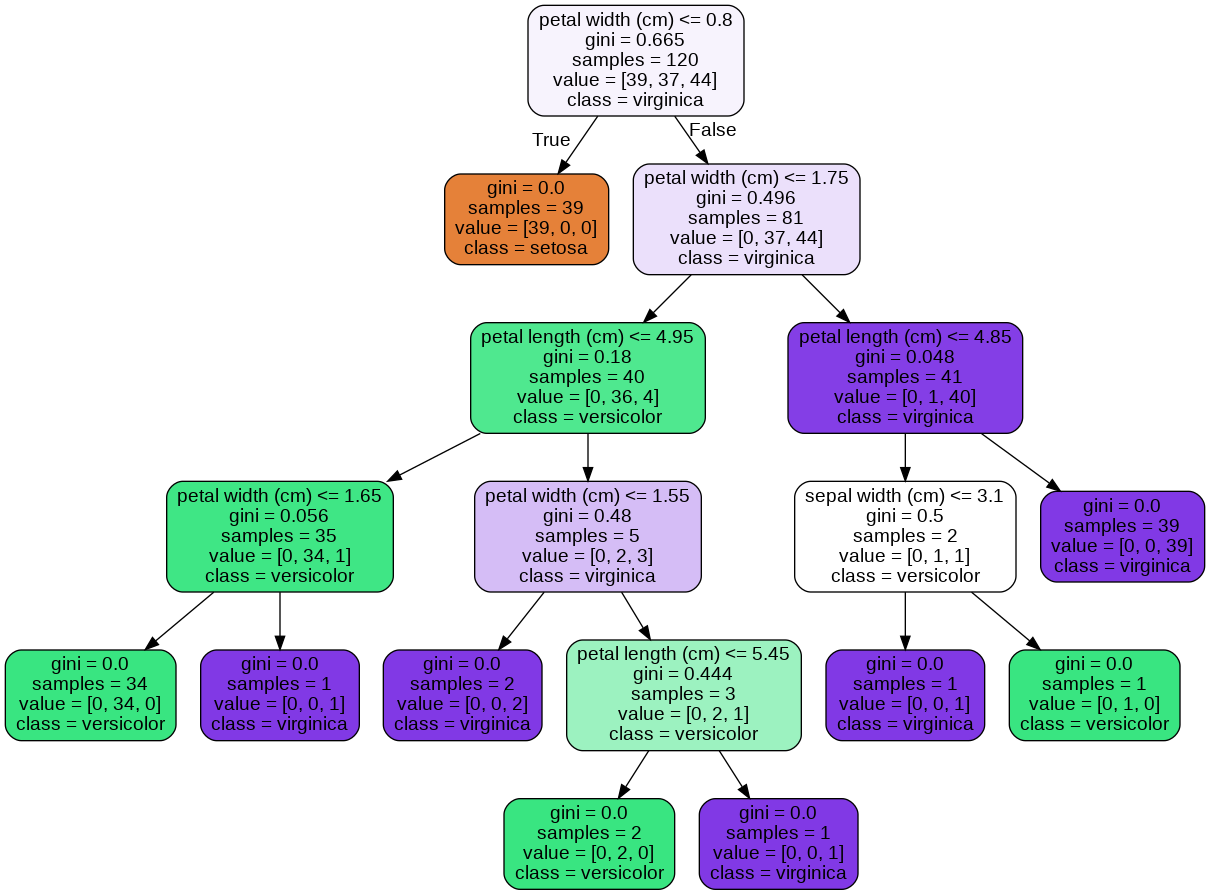

In [156]:
#Lets create a decision tree graph/image using the input features provided
dataStream = StringIO()
export_graphviz(decTreeModel , out_file = dataStream , feature_names = loaded_iris_data.feature_names , class_names = loaded_iris_data.target_names , rounded = True , filled = True)
decisionTreeGraph = pydotplus.graph_from_dot_data(dataStream.getvalue())
Image(decisionTreeGraph.create_png())

In [141]:
decTreeData.head(-50)#just to see the input feautres for each plant species

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


####**Step-9->Predict output class using new set of data on our model**
---

In [138]:
test_predictor_for_setosa = [4.9 , 3.3 , 1.5 , 0.3] #this is the test data that we will pass to see if it outputs class-0 or setosa plant
test_predictor_for_versicolor = [5.2 , 3.1 , 4 , 1] #this is the test data that we will pass to see if it outputs class-1 or versicolor plant
test_predictor_for_virginica = [6.7 , 3 , 5 , 1.8] #this is the test data that we will pass to see if it outputs class-2 or virginica plant
print("Check if it is Setosa plant species which is 0 :->" , decTreeModel.predict([test_predictor_for_setosa]))
print("Check if it is Versicolor plant species which is 1 :->" , decTreeModel.predict([test_predictor_for_versicolor]))
print("Check if it Virginica plant species which is 2 :->" , decTreeModel.predict([test_predictor_for_virginica]))

Check if it is Setosa plant species which is 0 :-> [0]
Check if it is Versicolor plant species which is 1 :-> [1]
Check if it Virginica plant species which is 2 :-> [2]


####**Step-10->Evaluate the Model and check for its accuracy**
---
**NOTE : The accuracy_score gives us the information/feedback on how well our model has been able to predict/perform on given dataset. Higher the score better the accuracy/performance is. The ideal/best score is 1.**

In [140]:
print( "The accuracy score of our model is :->"  , accuracy_score(Ylabel_test , Ylabel_Prediction))#here we have achieved the perfect/ideal score which is 1.0

The accuracy score of our model is :-> 1.0


#**Conclusion :-> As we can see that our model has got a perfect/ideal score of 1. Which implies that our model has been able to successfully capture the trends and pattern in our dataset as well as on new/unseen data. It has been able to generalize pretty well. So we can conclude our model has been able to get an exceptionally good accuracy for the given problemset**